# Задача 1. Разведочный анализ

- [X] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [X] Считать данные и вывести их основные характеристики, описание признаков.
- [X] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [X] (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [X] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [X] (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [X] (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Выбранный датасет

Датасет содержит физиологические параметры особей поссумов, пойманных в Австралии.

Признаки:
- `year` — год выпуска
- `make` — производитель
- `model` — модель
- `trim` — комплектация
- `body` — тип кузова
- `transmission` — тип коробки передач
- `vin` — уникальный номер
- `state` — штат
- `condition` — состояние от 1 до 5
- `odometer` — пробег
- `color` — цвет
- `interior` — цвет салона
- `seller` — продавец
- `mmr` — Manheim Market Report — коэффициент, помогающий оценить цену 
- `sellingprice` — цена продажи
- `saledate` — дата продажи

Предлагается решить задачу регрессии, определив цену автомобиля.

In [24]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [25]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,375113.000000,363320.000000,375028.000000,375113.000000,375113.000000
mean,2009.815208,3.413385,70190.255149,13374.038956,13224.329247
std,4.038283,0.961404,54521.254370,9421.923307,9511.046395
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28600.750000,6600.000000,6400.000000
50%,2011.000000,3.600000,54397.500000,12050.000000,11900.000000
75%,2013.000000,4.200000,102497.000000,17900.000000,17800.000000
max,2015.000000,5.000000,999999.000000,176000.000000,230000.000000


## Data Cleaning и Feature Engineering

Посмотрим, какие значения отсутствуют в датасете:

In [26]:
df.isnull().sum()

year                0
make             6480
model            6544
trim             6809
body             9353
transmission    41264
vin                 0
state               0
condition       11793
odometer           85
color             542
interior          542
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

### Признак make

In [27]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

Видим, что одна и та же компания может быть написана по-разному. В первую очередь приведем к общему виду.

In [28]:
df.make = df.make.str.lower()

In [29]:
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini'], dtype=object)

Далее в ручную собираем оставшиеся

In [30]:
df.loc[df.make == "ford truck", "make"] = "ford"
df.loc[df.make == "ford tk", "make"] = "ford"
df.loc[df.make == "dodge tk", "make"] = "dodge"
df.loc[df.make == "gmc truck", "make"] = "gmc"
df.loc[df.make == "hyundai tk", "make"] = "hyundai"
df.loc[df.make == "mazda tk", "make"] = "mazda"
df.loc[df.make == "land rover", "make"] = "landrover"
df.loc[df.make == "mercedes-benz", "make"] = "mercedes"
df.loc[df.make == "mercedes-b", "make"] = "mercedes"
df.loc[df.make == "vw", "make"] = "volkswagen"
df.loc[df.make == "chev truck", "make"] = "chevrolet"

In [31]:
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes', 'mitsubishi', 'mazda', 'mini', 'landrover',
       'lincoln', 'jaguar', 'volkswagen', 'toyota', 'subaru', 'scion',
       'porsche', nan, 'dodge', 'fiat', 'chrysler', 'ferrari', 'honda',
       'gmc', 'ram', 'smart', 'bentley', 'pontiac', 'saturn', 'maserati',
       'mercury', 'hummer', 'saab', 'suzuki', 'oldsmobile', 'isuzu',
       'geo', 'rolls-royce', 'daewoo', 'plymouth', 'tesla', 'airstream',
       'dot', 'aston martin', 'fisker', 'lamborghini'], dtype=object)

Заменять на самое частое значение не выглядит разумным (потому что не большой разрыв), а потеря 1.5% не такая большая.

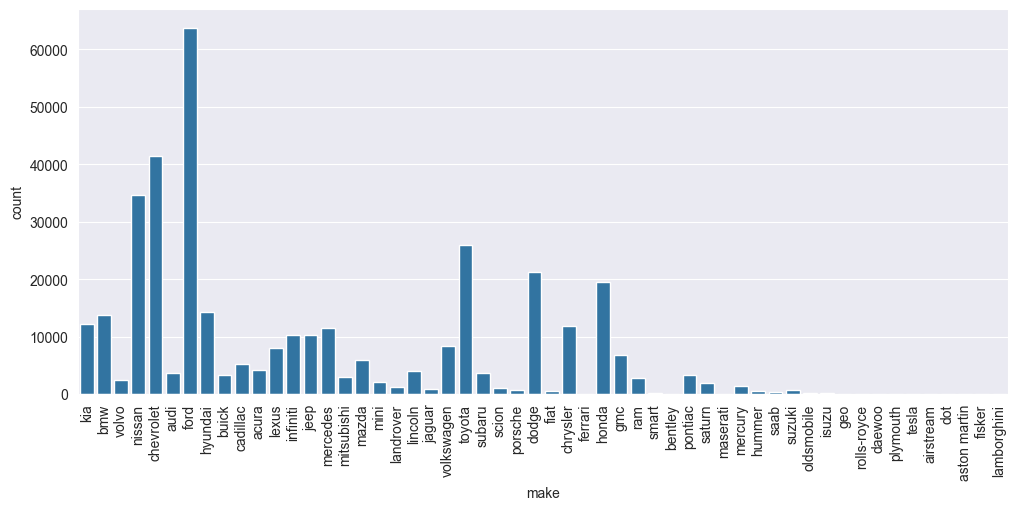

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.make)
plt.xticks(rotation=90);

In [33]:
df.dropna(subset=["make"], inplace=True)

In [34]:
df.make.nunique()

54

После удаления можно заметить, что почти все строки с отсутствующим признаком make не содержали модель тоже, следовательно, нельзя было догадаться по модели

In [35]:
df.isnull().sum()

year                0
make                0
model              64
trim              329
body             2873
transmission    40240
vin                 0
state               0
condition       11706
odometer           83
color             532
interior          532
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

### Признак model
Аналогично признаку make

In [36]:
df.model.unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       nan, 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',


In [37]:
df.make = df.make.str.lower()
df.model.nunique()

945

Остальные просто удалим

In [38]:
df.dropna(subset=["model"], inplace=True)

### Признак trim
Уникальных значений данного признака очень много, их будет тяжело классифицировать, поэтому просто удалим столбец. 

In [39]:
df.trim.nunique()

1886

In [40]:
df.drop(columns="trim", inplace=True)

### Признак transmission
Так как большинство машин имеют автоматическую коробку передач, заполним пропуски данным значением

<Axes: xlabel='transmission', ylabel='count'>

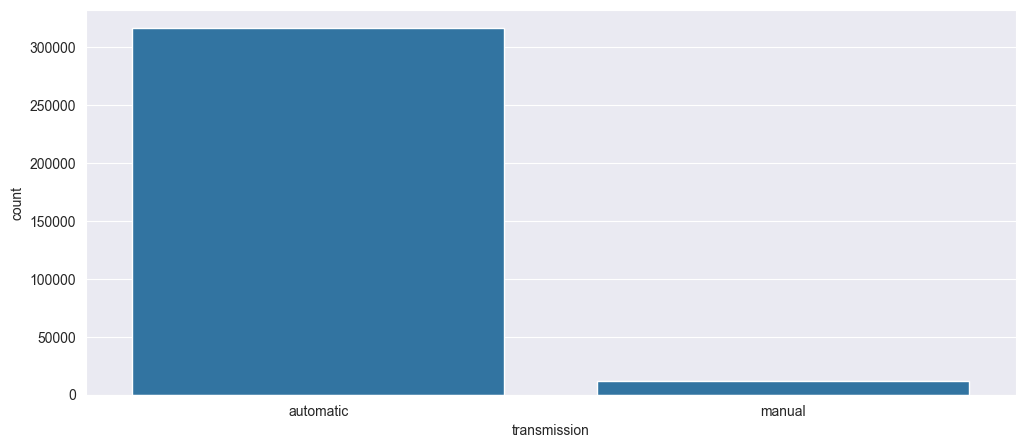

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.transmission)

In [42]:
df.transmission.fillna("automatic", inplace=True)

Также заменим строки на численные значения

In [43]:
is_automatic_list = []
for i in df.index:
    is_automatic_list.append(df['transmission'][i] == "automatic")

df["is_automatic"] = is_automatic_list

<Axes: ylabel='sellingprice'>

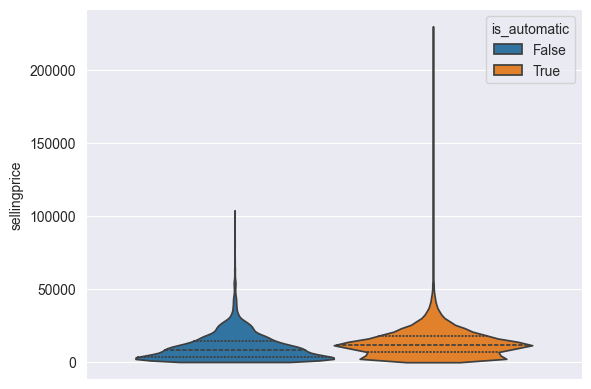

In [75]:
sns.violinplot(df, y="sellingprice", hue="is_automatic", split=False, cut=0,  inner="quart")

### Признак body
Аналогично модели и производителю приводим к общему виду

In [44]:
df.body = df.body.str.lower()

Заметим, что вместе с типом кузова еще указывают дополнительную информацию, которая создает помехи (напр, coupe, g coupe, elantra coupe - по факту одно и то же)

In [45]:
df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', nan, 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van'],
      dtype=object)

Можно заметить выделяются следующие повторения:

In [46]:
body_type_list = ["sedan","suv","cab","hatchback","coupe", "minivan","van","convertible","wagon", "crew"]

В ручную заменим "koup" заменить на "coupe", потому что это одно и то же.

In [47]:
df.loc[df.body == "koup", "body"] = "coupe"

А затем заменим на более короткие название из списка

In [48]:
for body in list(df.body.unique()):
  for body_type in body_type_list:
    if isinstance(body, str) and body_type in body:
      df.loc[df.body == body, "body"] = body_type
      break

In [49]:
df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'cab', 'minivan', nan, 'van', 'crew'], dtype=object)

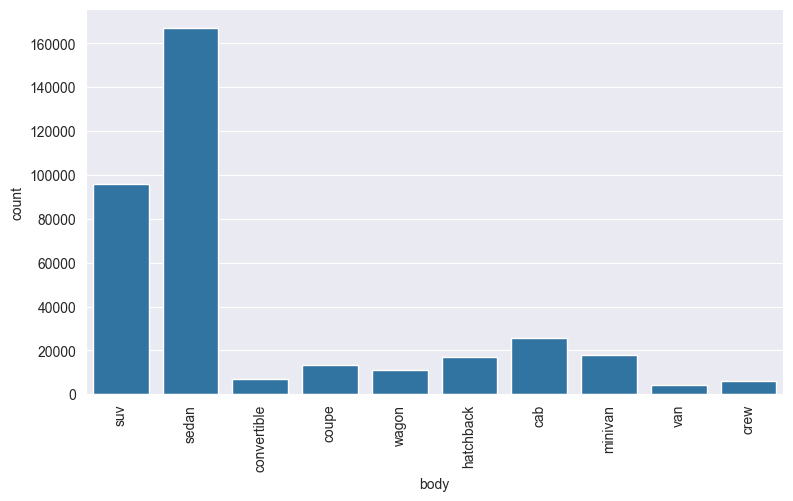

In [50]:
plt.figure(figsize=(9,5))
sns.countplot(x=df.body)
plt.xticks(rotation=90);

In [51]:
df.body.isnull().sum()

2873

Пустых значений не сильно много (<1%), так что я их просто удалю. Но при желании можно вычислить по модели и марке (напр. 1500 - truck или bmw 1 - hatchback).

In [52]:
df[df.body.isna()]

,year,make,model,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,is_automatic
468,2013,lincoln,mkt,NaN,automatic,2lmhj5nk1dbl52290,ca,4.1,74874.0,black,black,remarketing by ge/manheim southern california,19300,17750,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),True
743,2012,bmw,750i,NaN,automatic,wbakc6c5xcc395623,ca,4.0,50790.0,gray,black,financial services remarketing (lease),33900,33500,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),True
770,2012,bmw,750li,NaN,automatic,wbakb8c50cc963182,ca,3.7,31762.0,black,black,financial services remarketing (lease),45000,45000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),True
793,2012,bmw,750i,NaN,automatic,wbaka8c54ccy37992,ca,4.9,53016.0,white,gray,financial services remarketing (lease),31300,34250,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),True
794,2012,bmw,750li,NaN,automatic,wbakb8c56cc963431,ca,3.4,24739.0,white,gray,financial services remarketing (lease),47000,46750,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143544,2004,mercedes,c240w,NaN,automatic,wdbrf61j94a604886,ca,2.8,97969.0,black,gray,lexus of marin,4600,4200,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),True
144323,2011,ford,police,NaN,automatic,2fabp7bv4bx137684,mn,3.5,96409.0,blue,gray,select lane,4850,4300,Thu Jan 15 2015 02:30:00 GMT-0800 (PST),True
145012,2009,kia,borrego,NaN,automatic,kndjj741885007886,il,2.9,112614.0,gray,black,remarketing by ge/manheim chicago,7300,7000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST),True
145861,2005,ford,explorer,NaN,automatic,1fmzu73k05ub61705,ny,2.8,84017.0,silver,gray,adk auto brokers inc,5125,4900,Thu Jan 15 2015 01:45:00 GMT-0800 (PST),True


### Признак vin
Очень много уникальных соразмерных номеров, которые не несут в себе информационной нагрузки. Поэтому столбец следует удалить

In [53]:
df.vin.nunique(), len(df)

(363012, 368569)

In [54]:
df.drop(columns="vin", inplace=True)

### Признак state
Пропусков нет, все штаты унифицированны. Штат может влиять на стоимость. Остается без изменений.

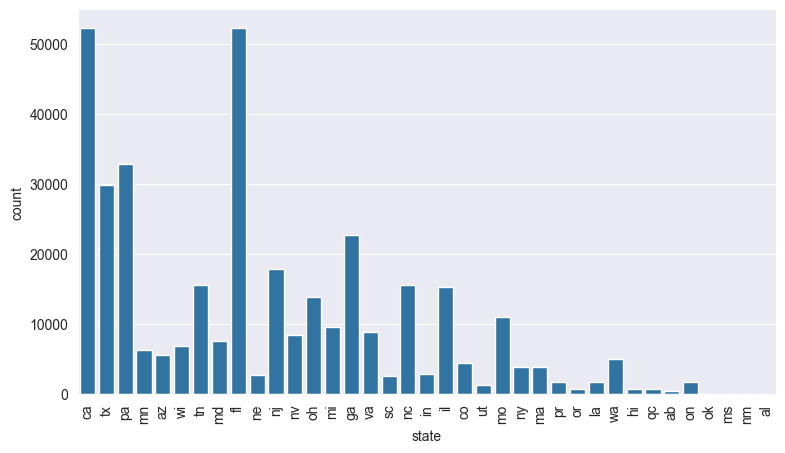

In [55]:
plt.figure(figsize=(9,5))
sns.countplot(x=df.state)
plt.xticks(rotation=90);

### Признак condition
Глядя на распределение данных, я думаю, что было бы разумно вписать среднее значение состояния в пропуски.

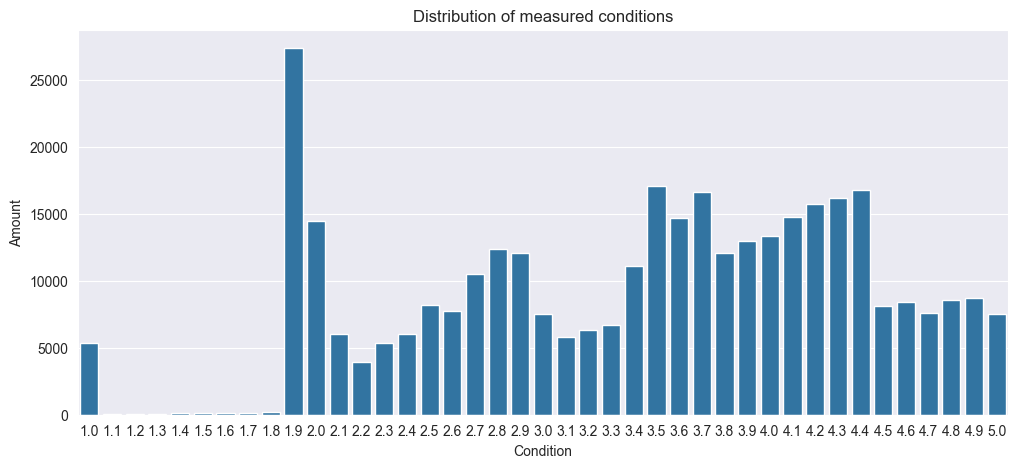

In [56]:
condition_y = df.condition.value_counts().sort_index()
condition_x = df.condition.value_counts().sort_index().index

plt.figure(figsize=(12,5))
sns.barplot(x=condition_x, y=condition_y).set(title="Distribution of measured conditions", xlabel="Condition", ylabel="Amount");


In [57]:
df.condition.fillna(df.condition.mean(), inplace=True)

In [58]:
df.condition.isnull().sum()

0

### Признак odometer
Аналогично предыдущему признаку

In [59]:
df.odometer.fillna(df.odometer.mean(), inplace=True)
df.odometer.isnull().sum()

0

### Признаки color и interior
Заметим, что количество пустых полей в колонках color и interior совпадает.

In [60]:
df.color.isnull().sum(), df.interior.isnull().sum()

(531, 531)

К тому же видим, что это не просто совпадение. Во всех полях где пустой цвет также не указан цвет интерьера.

In [61]:
df[df.color.isna()]

,year,make,model,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,is_automatic
493,2013,mercedes,M-Class,suv,automatic,ca,3.422358,32532.0,NaN,NaN,trade in solutions irvine,36100,34500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),True
1723,2012,mercedes,M-Class,suv,automatic,ca,3.422358,1.0,NaN,NaN,high bid trading co inc,69000,18500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),True
1824,2011,bmw,M3,sedan,automatic,ca,4.000000,26406.0,NaN,NaN,financial services remarketing (lease),41100,42500,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),True
2257,2011,mercedes,C-Class,sedan,automatic,ca,3.600000,34961.0,NaN,NaN,mercedes-benz financial services,21400,21500,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),True
2334,2011,mercedes,CLS-Class,sedan,automatic,ca,3.500000,27372.0,NaN,NaN,mercedes-benz usa,34500,30000,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373598,2013,ford,Escape,suv,automatic,tn,4.900000,11617.0,NaN,NaN,"ford motor credit company,llc",22700,22900,Wed Mar 04 2015 02:30:00 GMT-0800 (PST),True
373618,2013,ford,Explorer,suv,automatic,tn,4.800000,27728.0,NaN,NaN,"ford motor credit company,llc",20800,22300,Wed Mar 04 2015 02:30:00 GMT-0800 (PST),True
373678,2013,ford,Focus,sedan,automatic,tn,4.900000,19198.0,NaN,NaN,"ford motor credit company,llc",11550,12300,Wed Mar 04 2015 02:00:00 GMT-0800 (PST),True
374524,2012,nissan,Maxima,sedan,automatic,tn,4.100000,40731.0,NaN,NaN,nissan-infiniti lt,17050,18600,Wed Mar 04 2015 02:30:00 GMT-0800 (PST),True


Так как мы никак не можем восстановить цвет по названию или модели, просто удалит пустые ячейки, так как цвет может влиять на цену

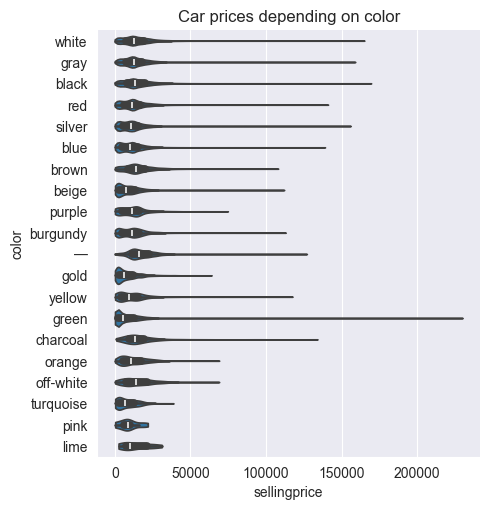

In [62]:
sns.catplot(x="sellingprice", y="color",kind="violin", cut=0, data=df).set(title="Car prices depending on color")

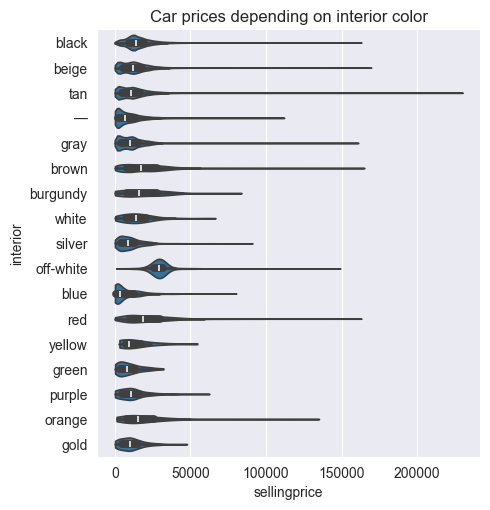

In [63]:
sns.catplot(x="sellingprice", y="interior",kind="violin", cut=0, data=df).set(title="Car prices depending on interior color")

In [64]:
df.dropna(subset=["color"], inplace=True)
df.dropna(subset=["interior"], inplace=True)

### Признак seller
Тут можно заметить связь между производителем и продажником. Насколько мне известно, при перепродаже машина теряет в цене. Соответственно это можно использовать, и заменить поле seller на булевое значение, где 1 если продает производитель и 0 иначе.

In [65]:
df[["make", "seller"]]

,make,seller
0,kia,"kia motors america, inc"
1,kia,"kia motors america, inc"
2,bmw,financial services remarketing (lease)
3,volvo,volvo na rep/world omni
4,bmw,financial services remarketing (lease)
...,...,...
375108,jeep,first investors servicing corp
375109,lexus,lexus of silver spring
375110,landrover,r hollenshead auto sales inc
375111,lexus,lexus of silver spring


In [66]:
is_seller_maker_list = []
for i in df.index:
    is_seller_maker_list.append(df['make'][i] in df['seller'][i])

df["is_seller_maker"] = is_seller_maker_list

У результирующего столбца уже заметная корреляция (при покупке у производителя максимум значительно выше и в целом цены выше, видно по графику ниже)

<Axes: ylabel='sellingprice'>

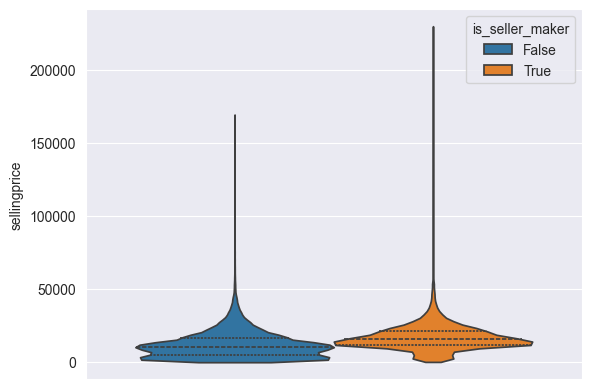

In [67]:
sns.violinplot(df, y="sellingprice", hue="is_seller_maker", split=False, cut=0,  inner="quart")

### Признак saledate
Как оказалось, база данных содержит записи о продаже только за 2 года: 2015 и 2014

In [68]:
from datetime import datetime

selling_year_list = []
for i in df.index:
  # Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
  selling_year_list.append(datetime.strptime(df.saledate[i][:-6], "%a %b %d %Y %H:%M:%S %Z%z").year)

df["selling_year"] = selling_year_list

In [69]:
df.selling_year.unique()

array([2014, 2015], dtype=int64)

In [70]:
df.drop(columns="selling_year", inplace=True)

От даты продажи может зависеть цена, можно перевести время продажи в дни года и посмотреть как меняется цена. Так как лет не много, по годам смысла смотреть нет.

In [71]:
selling_timestamp = []
for i in df.index:
    # Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
    selling_timestamp.append(datetime.strptime(df.saledate[i][:-6], "%a %b %d %Y %H:%M:%S %Z%z").replace(microsecond=0, second=0, minute=0, hour=0, year=2015).timestamp())

df["selling_timestamp"] = selling_timestamp

In [72]:
df.selling_timestamp.nunique()

140

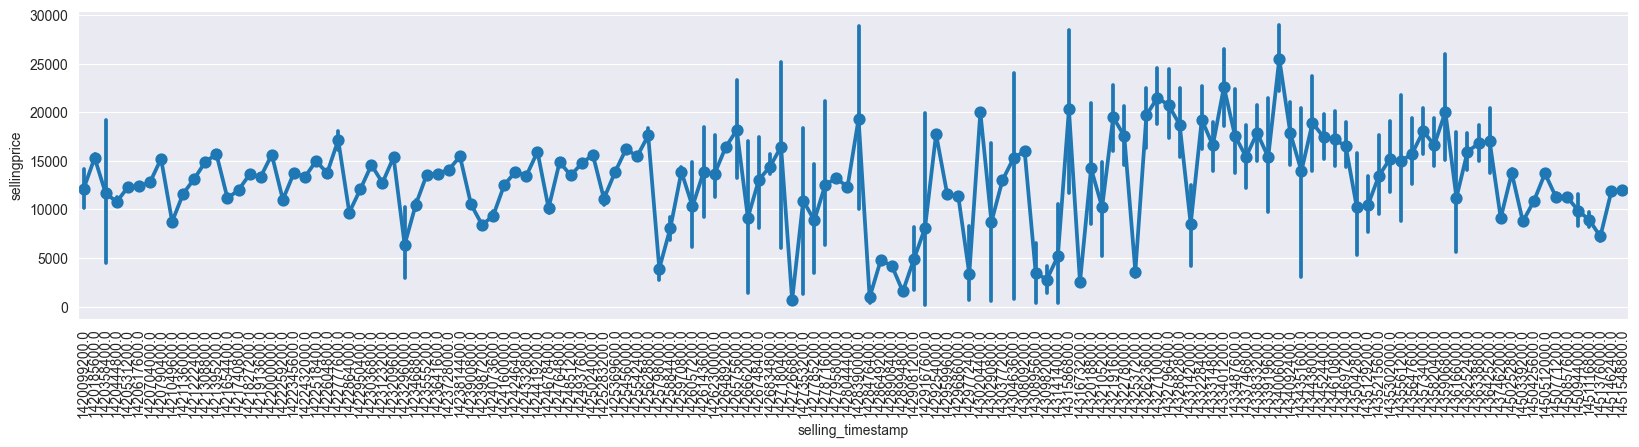

In [73]:
plt.figure(figsize=(20,4))
sns.pointplot(df, y="sellingprice", x="selling_timestamp")
plt.xticks(rotation=90);

Для наглядности можно перевести в более читаемый вид, но сейчас это не так важно.

### Признак MMR
Как мы видим по изображению ниже данный признак наиболее точно корригируется с ценой. К тому же у него нет пропусков, однозначно самый полезный признак.

<Axes: >

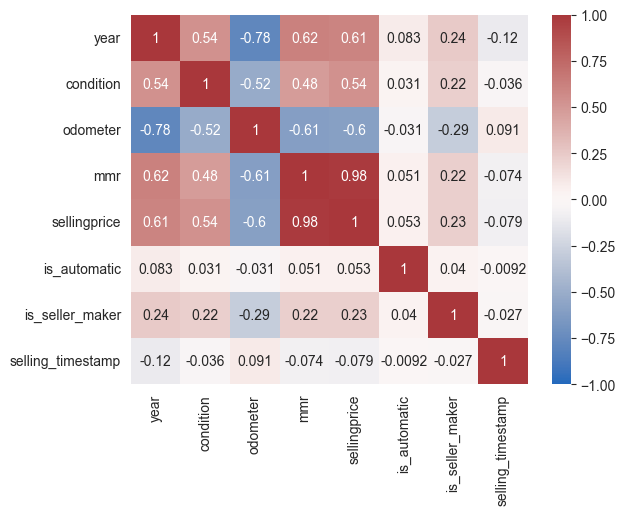

In [74]:
df_quantitative = df.drop(columns=["make", "model", "body", "transmission", "state", "color", "interior", "seller", "saledate"])
sns.heatmap(df_quantitative.corr(), vmin=-1, vmax=1, annot=True, cmap="vlag")

Также по данной матрице корреляции видно, что большое значение на цену играет признаки odometer, год выпуска и состояние (что логично). Признак продажи поставщиком тоже играет роль, но меньшую. Как оказалось, тип коробки передач совсем не влиял на цену. А вот время нужно еще доработать, чтобы его можно было использовать, но и без него уже достаточно информации, которая невзаимозаменяема.